#### Feature Importance | Which features are most important?

- techniques used to assign a score to features based on how useful they are at predicting a variable

### (part 1) Feature Selection | "selecting for"

- process by which features are automaticlaly selected to contribute the most to the target
- removing those that are unecessary to the dataset

#### [1] Selecting for Features by Missing Values or LIttle Variance

To remove low variance features (that contain little information in good use for analysis), one can use the built-in feature selection tools from scikit-learn, called **VarianceThreshold()**.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=1)
sel.fit(df)

mask = sel.get_support()
print(mask)

In [ ]:
reduced_df = df.loc[:, mask]

#### Normalizing the Variance for Feature Selection

This can become really critical when features have a lot of variance and this can cause issues in the modeling, so normalization before feature selection can prove useful.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshol(threshold=0.005)
sel.fit(df/df.mean())

mask = sel.get_support()
reduced_df = df.loc[:, mask]

#checking for how reduced the dataset is
print(reduced_df.shape)

#### Looking at missing Values for Features

In [ ]:
#missing values can be summed (counted) by the .isna() (boolean) 
#and .sum() which counts True as a value of 1 and False as a value of  zero

df.isna().sum()/len(df)  #if we divide by the total length of df, we get a ratio

#### [2] Selecting for Features Using Pariwise Correlation

Using the correlation coefficient is a method to quantify the pairwise relationships.

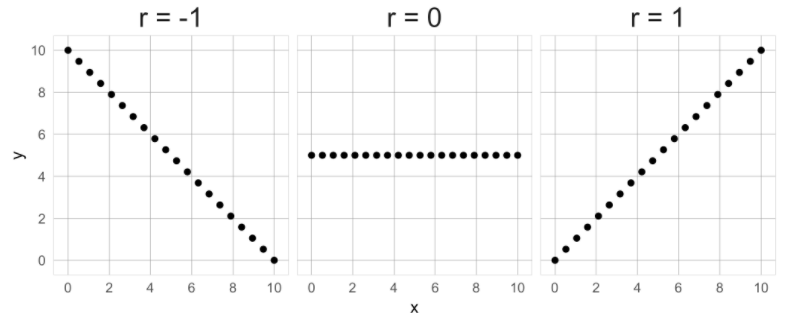

##### Correlation Matrix

In [ ]:
df.corr()

##### Visualizing Correlation Matrix

In [ ]:
cmap = sns.diverging_palette(h_neg=10,
                            h_pos=240,
                            as_camp=True)

sns.heatmap(df.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt-".2f")

In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

#### [3] Removing Highly Correlated Features

These are features that are similar in nature to each other that co-occur similarly with one another and therefore will have a correlation coefficient of something close to 1 or -1.

In [ ]:
#Removing Highly Correlated Features

#1 - positive correlation matrix
corr_df = df.corr().abs()

#2 - createa and apply mask
mask = np.triu(np.ones_like(corr_df, dtype=bool))

#3 - pass mask to the pandas dataframe
tri_df = corr_matrix.mask(mask)

tri_df #would provide NaNs

example: 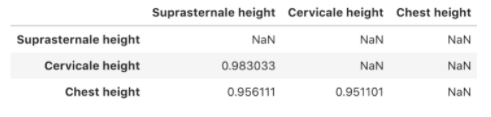

In [ ]:
#4 - find columns that meet a threshold of coefficient value greater than 0.95
to_drop = [
    c for c in tri_df.columsn if any(tri_df[c] > 0.95)
]

print(to_drop)

In [ ]:
#5 - Drop features
reduced_df = df.drop(to_drop, axis=1)

#### [4] Non-Linear Relationships & Outliers to Correlation Coefficient

Its important to visualize your data early on to determine type of relationships between variables/features to later understand how to approach the correlation cofficient

Important to remeber: **corelattion is not causation**

### (part 2) Feature Selection | "taking into account model performance"

#### [1] Selecting Features for Model Performance

###### Pre-Processing the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#scaling the train/test features
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

##### Creating a Logistic Regression Model on the Train/Test Split

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

#train the model on the train split
lr.fit(X_train_std, y_train)  #using the StandardScaler transformed X_train

#make the predictions on the test split
y_pred = lr.predict(X_test_std)

##### Evaluating the Accuracy of the model using the y_test, and y_pred

In [ ]:
print(accuracy_score(y_test, y_pred))

##### inspecting the correlation coefficients

In [ ]:
print(lr.coef_)

In [ ]:
#turn the data into a dictionary of the column and its correlation coefficient
print(dict(zip(X.columns, abs(lr.coef_[0]))))

When removing the feaures that contribute little to a model, the accuracy remains the close to or the same, and this can be a good way to confirm the removal is okay to perform since those features did not contribute much to the accuracy.

In [ ]:
#rerunning the model by dropping the column
X.drop('column_to_drop', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr.fit(X_train_std, y_train)
print(accuracy_score(y_test, y_pred))

#### [2] Scikit learn Library to Select for Features Automatically

#### Recursive Feature Elimination - RFE

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), #the model we want to use
          n_features_to_select=2,         #the number of features we want to use
          verbose=1)
#automatically drops the features with the weakest coefficients
#this recursive method is useful because with each feature removal, the coefficients will change.

rfe.fit(X_train_std, y_train)

In [ ]:
#inspecting the RFE results
X.columns[rfe.support_]

print(dict(zip(X.columns, rfe.ranking_)))
print(accuracy_score(y_test, rfe.predict(X_test_std)))
print(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

#### [3] Tree-Based Feature Selection | Random Forest Classifier

It is an ensemble model that will pass different, random, subsets of features to a number of decision trees.  To make a prediction, it will aggregate over the predictions of the individual trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(accuracy_score(y_test, rf.predict(X_test)))

##### Feature Importance Attribute

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print(rf.feature_importances_)

The sum of all feature importance values will equal to 1.

In [ ]:
print(sum(rf.feature_importances_))

Feature selector threshold

In [ ]:
mask = rf.feature_importances_ > 0.1\
print(mask)

Apply to dataframe

In [ ]:
X_reduced = X.loc[:, mask]
print(X_reduced.columns)

Dropping one feature, again, will impact the importance of the remaining features against each other.

In [ ]:
#re-determining the importance
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(),
         n_features_to_select=6,
         verbose=1)

rfe.fit(X_train, y_train)

In [ ]:
#check the impact of the accuracy_score
print(accuracy_score(y_test, rfe.predict(X_test)))

In [ ]:
#to speed up the process, adding the step parameter
#with each iteration the 10 least features are dropped rather than 1 feature per iteration
#re-determining the importance
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestClassifier(),
         n_features_to_select=6,
          step=10,
         verbose=1)

rfe.fit(X_train, y_train)

In [ ]:
#print the remaining columns
print(X.columns[rfe.support_])

### Feature Extraction | "creation of"

- this is a feature reduction process
- **transforms** the features
- selecting for or combining variables into features
- in other words: combining attributes into a new reduced set of features